**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [2]:
df = pd.read_csv("water_data.csv") 
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


**Analyse the dataset**

In [3]:
df.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [5]:
df.shape

(1991, 12)

**Handle Missing values**

In [6]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       STATION CODE  LOCATIONS  STATE   Temp  D.O. (mg/l)     PH  \
0            False      False  False  False        False  False   
1            False      False  False  False        False  False   
2            False      False  False  False        False  False   
3            False      False  False  False        False  False   
4            False      False  False  False        False  False   
...            ...        ...    ...    ...          ...    ...   
1986         False      False  False  False        False  False   
1987         False      False  False  False        False  False   
1988         False      False  False  False        False  False   
1989         False      False  False  False        False  False   
1990         False      False  False  False        False  False   

      CONDUCTIVITY (µmhos/cm)  B.O.D. (mg/l)  \
0                       False          False   
1                       False        

In [7]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [8]:
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [9]:
df.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [10]:
df['Temp'].fillna(df['Temp'].mean(),inplace=True)
df['D.O. (mg/l)'].fillna(df['D.O. (mg/l)'].mean(),inplace=True)
df['PH'].fillna(df['PH'].mean(),inplace=True)
df['CONDUCTIVITY (µmhos/cm)'].fillna(df['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
df['B.O.D. (mg/l)'].fillna(df['B.O.D. (mg/l)'].mean(),inplace=True)
df['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(df['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
df['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(df['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [11]:
start=2
end=1779
station=df.iloc [start:end ,0]
location=df.iloc [start:end ,1]
state=df.iloc [start:end ,2]
do= df.iloc [start:end ,4].astype(np.float64)
value=0
ph = df.iloc[ start:end,5]  
co = df.iloc [start:end ,6].astype(np.float64)   
year=df.iloc[start:end,11]
tc=df.iloc [2:end ,10].astype(np.float64)
bod = df.iloc [start:end ,7].astype(np.float64)
na= df.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

**Splitting the data into dependent and independent variables**

In [12]:
df=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
df.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [13]:
df.head()

,station,location,state,do,ph,co,bod,na,tc,year
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014


In [14]:
df=df.rename(columns={'D.O. (mg/l)':'do'})
df=df.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
df=df.rename(columns={'B.O.D. (mg/l)':'bod'})
df=df.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
df=df.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
df=df.rename(columns={'STATION CODE':'station'})
df=df.rename(columns={'LOCATIONS':'location'})
df=df.rename(columns={'STATE':'state'})
df=df.rename(columns={'PH':'ph'})
df_new=df

**Water Quality Index Calculation**

In [15]:
df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))
df['nph']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
df['ndo']=df.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
df['nbod']=df.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
df['nco']=df.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [16]:
df.head()
df.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
nec           int64
nna           int64
nph           int64
ndo           int64
nbod          int64
nco           int64
dtype: object

In [17]:
df['wph']=df.nph * 0.165
df['wdo']=df.ndo * 0.281
df['wbod']=df.nbod * 0.234
df['wec']=df.nec * 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['wqi']=df.wph + df.wdo + df.wbod + df.wec+ df.wna + df.wco
df

,station,location,state,do,ph,co,bod,na,tc,year,...,ndo,nbod,nco,wph,wdo,wbod,wec,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,6.300,6.900,179.000000,1.7,0.100000,5330.00000,2014,...,100,100,40,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.800,6.900,64.000000,3.8,0.500000,8443.00000,2014,...,80,80,40,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.800,7.300,83.000000,1.9,0.400000,5500.00000,2014,...,80,100,40,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.500,7.400,81.000000,1.5,0.100000,4049.00000,2014,...,80,100,40,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.100,6.700,308.000000,1.4,0.300000,5672.00000,2014,...,100,100,40,9.9,28.10,23.40,0.00,2.8,11.24,75.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,1428,"KHARKHLA NEAR SUTNGA KHLIERIAT,JAINTIA HILLS D...",NAN,4.600,3.000,350.000000,6.2,2.200000,49.00000,2006,...,60,60,80,0.0,16.86,14.04,0.00,2.8,22.48,56.18
1775,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,8.800,7.000,172.000000,1.6,5.000000,2800.00000,2006,...,100,100,40,16.5,28.10,23.40,0.54,2.8,11.24,82.58
1776,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,10.000,7.100,150.000000,1.0,4.000000,350.00000,2006,...,100,100,60,16.5,28.10,23.40,0.72,2.8,16.86,88.38
1777,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,9.000,7.300,158.000000,1.8,7.200000,280.00000,2006,...,100,100,60,16.5,28.10,23.40,0.54,2.8,16.86,88.20


In [18]:
avg=df.groupby('year')['wqi'].mean()
avg.head()

year
2006    72.961176
2007    74.233000
2008    73.506289
2009    74.456685
2010    75.454787
Name: wqi, dtype: float64

**Visualization**

**Univariate Analysis**

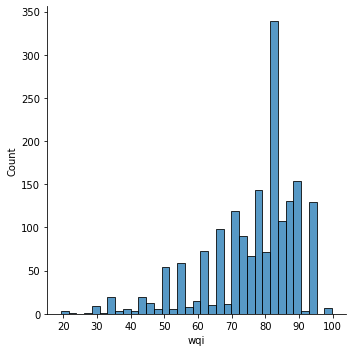

In [19]:
sns.displot(df.wqi)

**Bivariate Analysis**

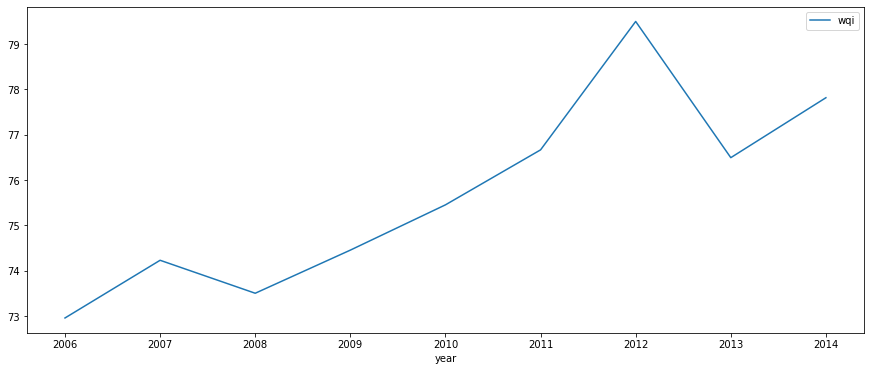

In [20]:
yearly = df.groupby('year')['wqi'].mean()
yearly_wqi = yearly.reset_index(level=0,inplace=False)
yearly_wqi=yearly_wqi.set_index('year')
yearly_wqi.plot(figsize=(15,6))
plt.show()

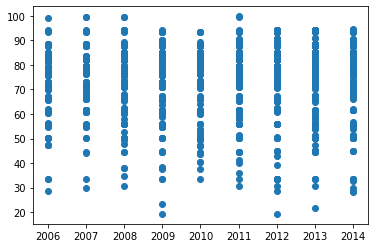

In [21]:
cols =['year']
y = df['wqi']
x=df[cols]
plt.scatter(x,y)
plt.show()

**Training the Model**

In [25]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [26]:
df.head()

,station,location,state,do,ph,co,bod,na,tc,year,...,ndo,nbod,nco,wph,wdo,wbod,wec,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,...,100,100,40,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,...,80,80,40,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,...,80,100,40,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,...,80,100,40,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014,...,100,100,40,9.9,28.10,23.40,0.00,2.8,11.24,75.44


In [27]:
x = pd.DataFrame(df, columns =['co','bod','na','tc','ph','do'])
y = df['wqi']
y

2       79.28
3       69.34
4       77.14
5       77.14
6       75.44
        ...  
1774    56.18
1775    82.58
1776    88.38
1777    88.20
1778    70.80
Name: wqi, Length: 1777, dtype: float64

In [28]:
df_new['co'].fillna(df_new['co'].mean(),inplace=True)
df_new['bod'].fillna(df_new['bod'].mean(),inplace=True)
df_new['ph'].fillna(df_new['ph'].mean(),inplace=True)
df_new['na'].fillna(df_new['na'].mean(),inplace=True)
df_new['tc'].fillna(df_new['tc'].mean(),inplace=True)
df_new['do'].fillna(df_new['do'].mean(),inplace=True)

In [29]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [30]:
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
a=reg.predict(x_test)
print(x_test)
print(len(a))

          co        bod      na            tc     ph     do
1747   299.3   3.667000   1.525     771.00000  7.125  6.825
489    202.0  13.600000  15.000   20056.00000  7.200  4.700
1575    80.0   1.400000   0.100    1010.00000  7.100  7.400
149    243.0   1.700000   0.900   30319.00000  8.000  7.500
104     70.0   1.400000   0.100     822.00000  7.000  6.600
...      ...        ...     ...           ...    ...    ...
1324   864.0   1.500000   0.370     876.00000  6.500  5.800
950   1086.0   6.940049   0.100  533687.16568  8.100  3.000
440    971.0  14.800000   5.000    8425.00000  7.300  5.100
1437   478.0  16.300000   0.350    1008.00000  7.000  5.200
452    407.0  16.300000   0.000     120.00000  7.400  4.900

[356 rows x 6 columns]
356


In [32]:
y_test

1747    77.72
489     50.74
1575    82.76
149     71.16
104     82.94
        ...  
1324    66.52
950     44.58
440     67.06
1437    67.06
452     67.06
Name: wqi, Length: 356, dtype: float64

**Checking the Metrics of Model**

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean square error: ",mean_squared_error(y_test,a))
print("Mean absolute error: ",mean_absolute_error(y_test,a))
print("R_2 score: ",r2_score(y_test,a))

Mean square error:  91.08982449225519
Mean absolute error:  7.606715556111616
R_2 score:  0.6032158207807568


**Saving the Model**

In [34]:
import pickle
pickle.dump(reg,open('wqi.pkl','wb'))
model=pickle.load(open('wqi.pkl','rb'))